# Level 2

## Task 4 : Restaurant Chains

* Identify if there are any restaurant chains present in the dataset.
* Analyze the ratings and popularity of different restaurant chains.

### Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
#loading the dataset .csv file from my google drive shared folder
url = "https://drive.google.com/uc?export=download&id=1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y"
df = pd.read_csv(url)
#previewing first few rows of the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# Checking the total number of rows and columns
df.shape

(9551, 21)

### Identifying if there are any restaurant chains present in the dataset

In [4]:
restaurants_counts = df['Restaurant Name'].value_counts()
chains = restaurants_counts[restaurants_counts > 1]
print("Restaurant Chains Found:\n\n", chains)

Restaurant Chains Found:

 Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
San Carlo            2
Gymkhana             2
Dishoom              2
Timboo Cafe          2
D�_vero��lu          2
Name: count, Length: 734, dtype: int64


### Analyzing the ratings and popularity of different restaurant chains

In [5]:
#filtering the dataframe to show only restaurants that have chains
chain_data = df[df['Restaurant Name'].isin(chains.index)]

#grouping by 'Restaurant Name' and calculating average rating and total votes for popularity
chain_analysis = chain_data.groupby(chain_data['Restaurant Name']).agg({'Aggregate rating' : 'mean' , 'Votes' : 'sum'}).sort_values(by='Votes', ascending=False)
chain_analysis['Aggregate rating'] = round(chain_analysis['Aggregate rating'],1)
chain_analysis

,Aggregate rating,Votes
Restaurant Name,,
Barbeque Nation,4.4,28142
AB's - Absolute Barbecues,4.8,13400
Big Chill,4.5,10853
Farzi Cafe,4.4,10098
Truffles,4.0,9682
...,...,...
Garam Masala,0.0,0
Green Valley Chinese Food,0.0,0
Jyoti Sweets,0.0,0


### Visualizing using Bar Chart

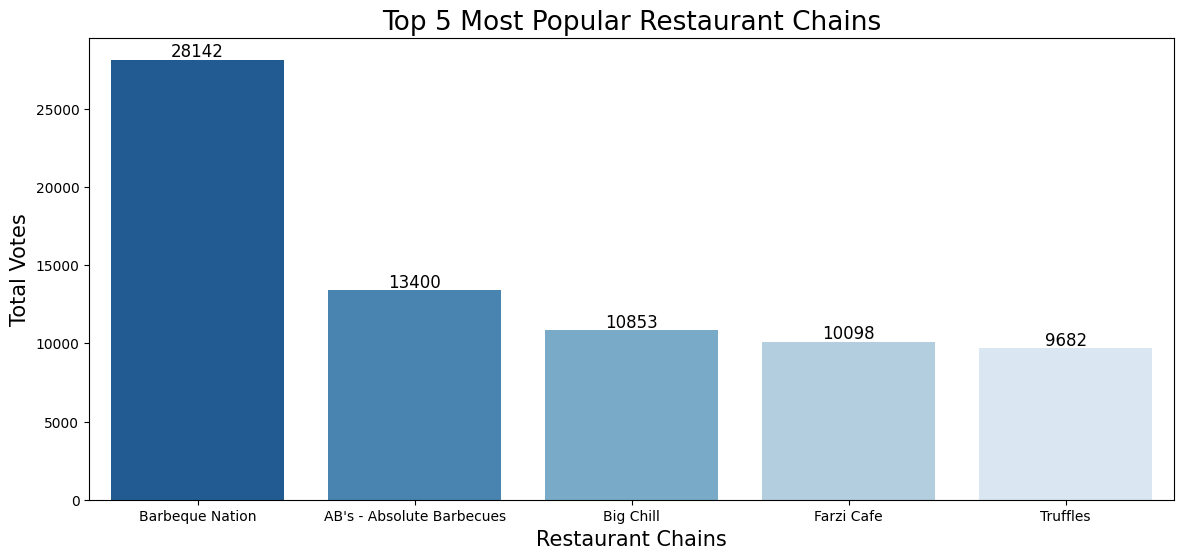

In [6]:
top5chains = chain_analysis.head()

# Bar plot for the top 5 most popular restaurant chains
plt.figure(figsize=(14, 6))
sns.barplot(x = top5chains.index , y = top5chains['Votes'] , hue = top5chains.index , palette = "Blues_r")

#adding data labels
for index, row in top5chains.iterrows():
    plt.text(x = index, y = row['Votes'] + 200, s = f"{int(row['Votes'])}", ha = 'center', fontsize = 12)
    
#labeling the chart   
plt.xlabel("Restaurant Chains" , fontsize = 15)
plt.ylabel("Total Votes", fontsize = 15)
plt.title("Top 5 Most Popular Restaurant Chains", fontsize = 19)

plt.show()